In [1]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu, levene, chisquare,chi2_contingency, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Read the data as a data frame and check info

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# 2. Perform basic EDA which should include the following and print out your insights at every step.

a) Shape of the data

In [4]:
shape = df.shape
print("Records: ",shape[0],", Parameters: ",shape[1])

Records:  1338 , Parameters:  7


b) Data type of each attribute

In [5]:
print("Data Type for each attribute are:")
df.dtypes

Data Type for each attribute are:


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

c) Checking the presence of missing values

In [6]:
print("Number of missing values :")
df.isnull().sum()

Number of missing values :


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

d) 5 points summary

In [7]:
print("5 point summary: min, 1st quartile(25%), 2nd quartile/ median(50%), 3rd quartile(75%), max :")
df.describe()[3:][:]

5 point summary: min, 1st quartile(25%), 2nd quartile/ median(50%), 3rd quartile(75%), max :


,age,bmi,children,charges
min,18.0,15.96000,0.0,1121.873900
25%,27.0,26.29625,0.0,4740.287150
50%,39.0,30.40000,1.0,9382.033000
75%,51.0,34.69375,2.0,16639.912515
max,64.0,53.13000,5.0,63770.428010


e) Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

 Distribution of ‘bmi’, ‘age’ and ‘charges’ columns


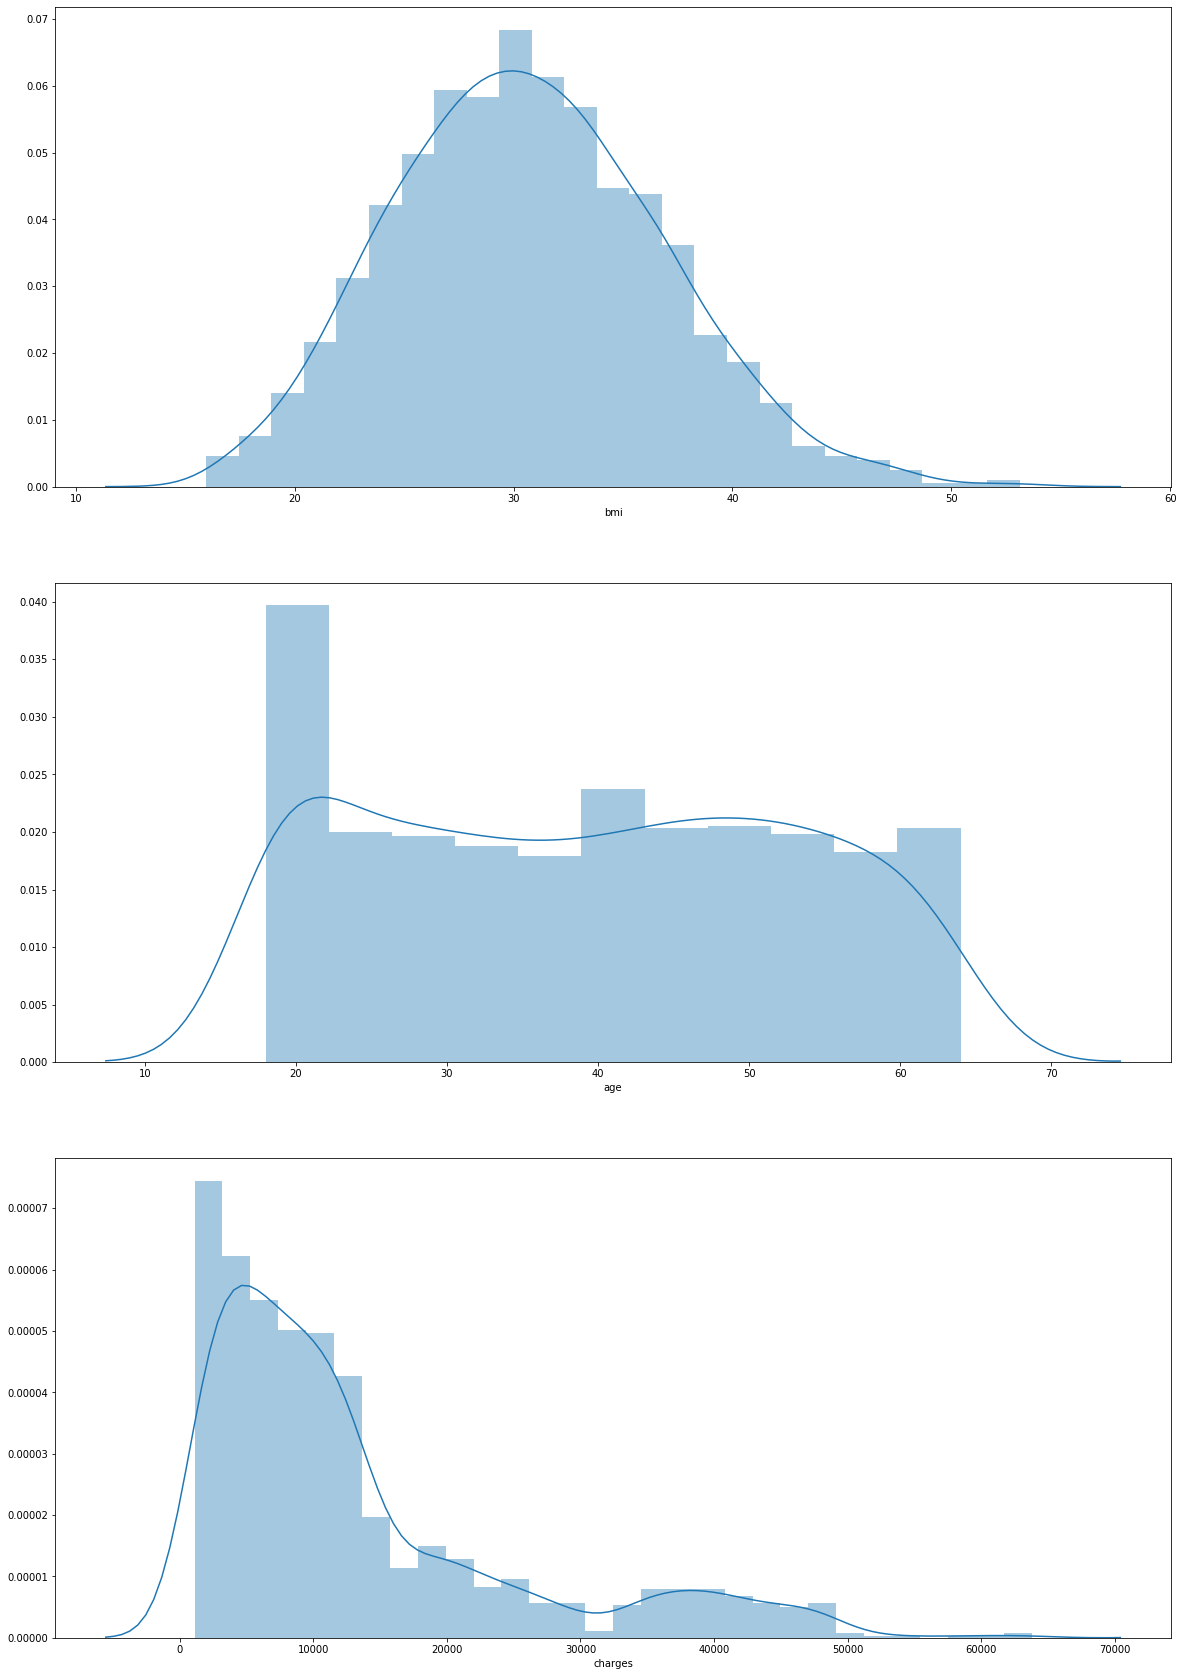

In [8]:
print(" Distribution of ‘bmi’, ‘age’ and ‘charges’ columns")
plt.figure(figsize=(20,30))
plt.subplot(3,1,1)
sns.distplot(df['bmi'])
plt.subplot(3,1,2)
sns.distplot(df['age'])
plt.subplot(3,1,3)
sns.distplot(df['charges'])

f) Measure of skewness of ‘bmi’, ‘age’ and ‘charges’

In [9]:
print("Measure of skewness for:") 
df[["bmi","age","charges"]].skew(axis = 0, skipna = True)

Measure of skewness for:


bmi        0.284047
age        0.055673
charges    1.515880
dtype: float64

g) Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges
columns.

Outliers present for 'bmi'


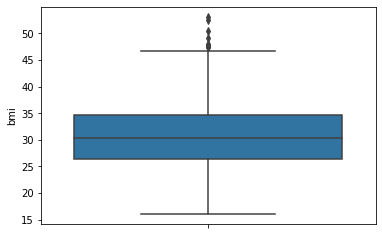

In [10]:
sns.boxplot(y=df['bmi'])

print("Outliers present for 'bmi'")

No outliers for age


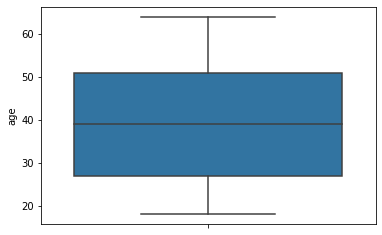

In [11]:
sns.boxplot(y=df['age'])

print("No outliers for age")

Outliers present for 'charges'


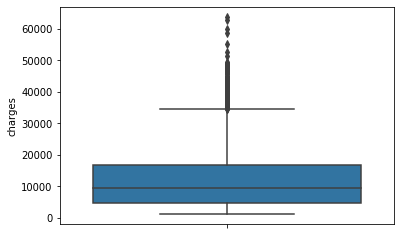

In [12]:
sns.boxplot(y=df['charges'])

print("Outliers present for 'charges'")

 h) Distribution of categorical columns (include children)

Distribution of sex with hue children againt bmi


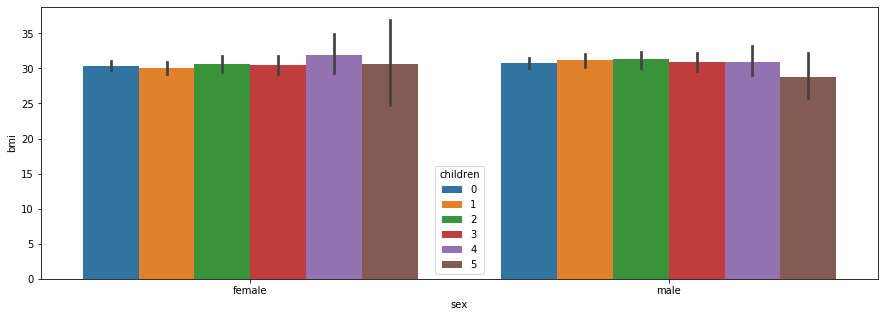

In [13]:
print("Distribution of sex with hue children againt bmi")
plt.figure(figsize=(15,5))
sns.barplot(x="sex",y="bmi", hue="children", data = df)

Distribution of smoker with hue children againt bmi


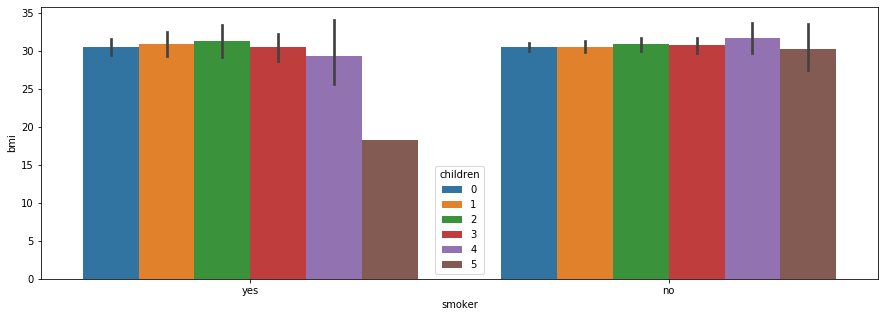

In [14]:
print("Distribution of smoker with hue children againt bmi")
plt.figure(figsize=(15,5))
sns.barplot(x="smoker",y="bmi", hue="children", data = df)

Distribution of region with hue children againt bmi


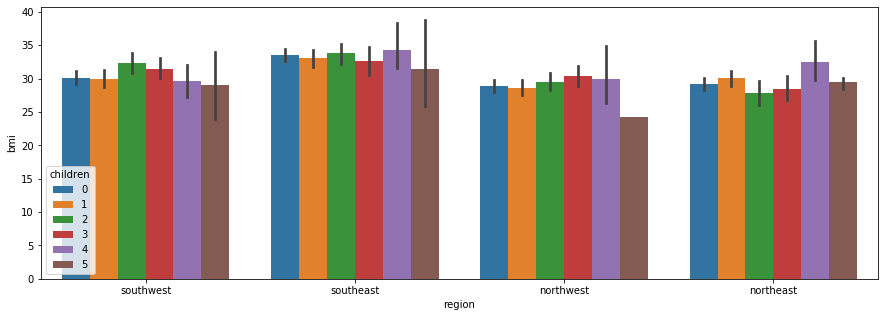

In [15]:
print("Distribution of region with hue children againt bmi")
plt.figure(figsize=(15,5))
sns.barplot(x="region",y="bmi", hue="children", data = df)

i) Pair plot that includes all the columns of the data frame

<Figure size 1800x1440 with 0 Axes>

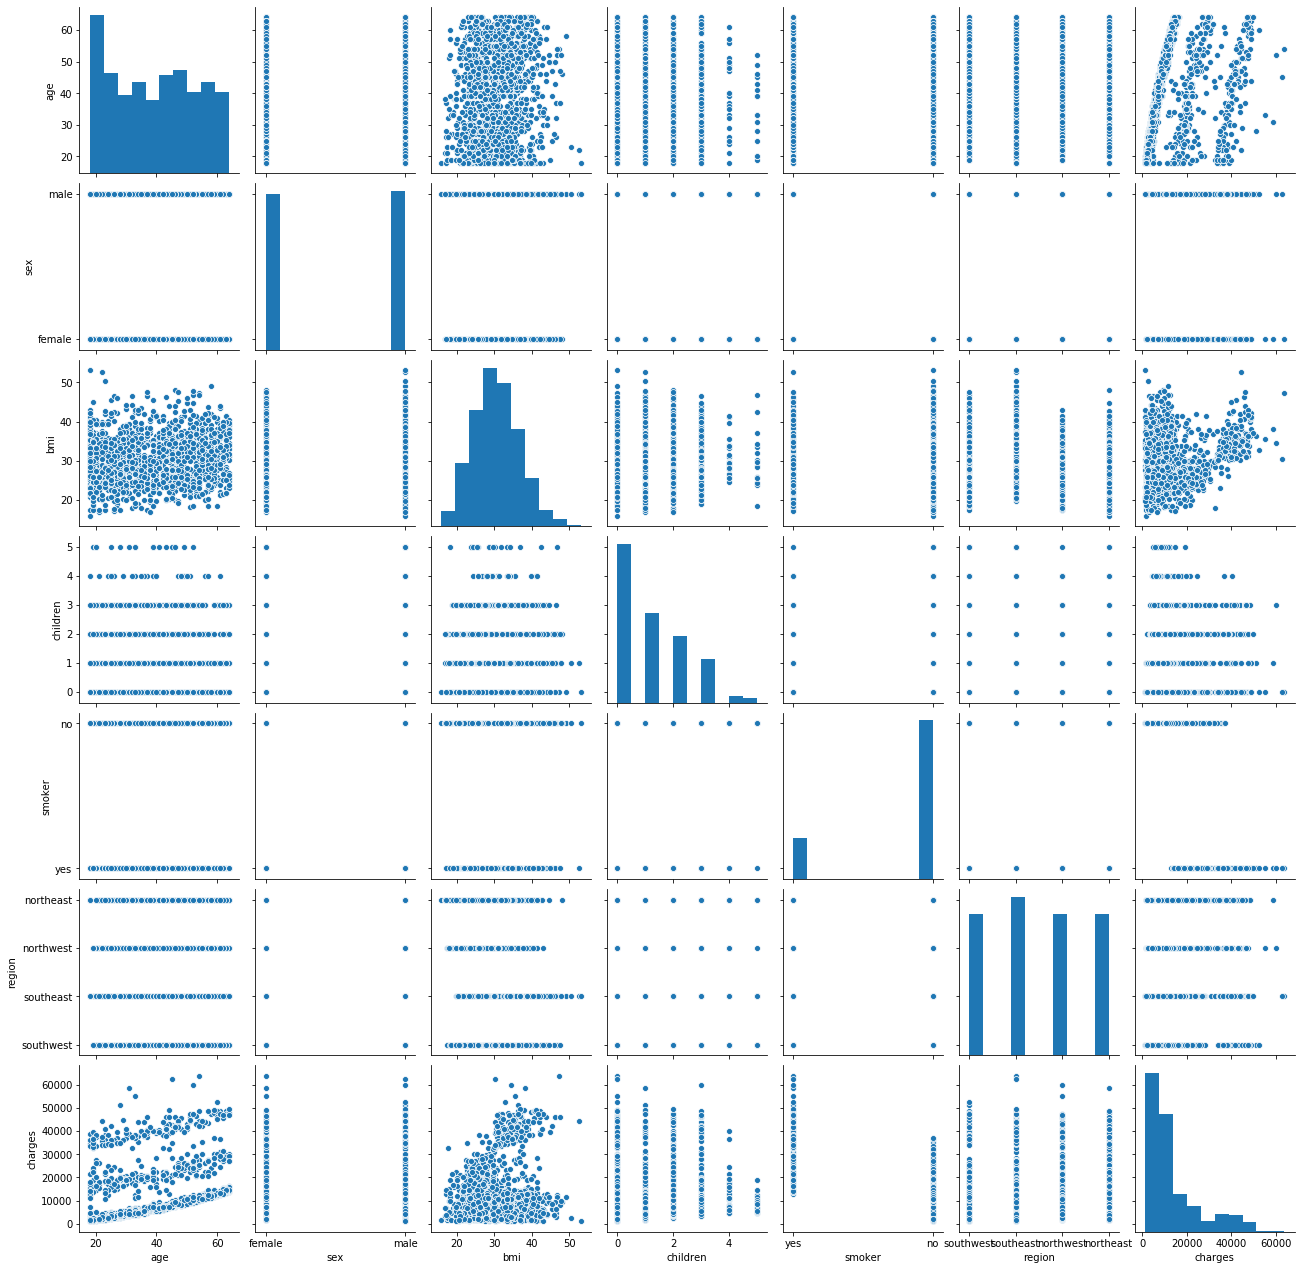

In [16]:
plt.figure(figsize=(25,20))
sns.pairplot(df, vars=['age','sex','bmi','children','smoker','region','charges'])

# Answer the following questions with statistical evidence

a. Do charges of people who smoke differ significantly from the people who don't ?

In [17]:
smoke = np.array(df[df.smoker == 'yes'].charges)
no_smoke = np.array(df[df.smoker == 'no'].charges)

# For checking equality of population variance between groups
# Ho: Variances are equal
statistic, p_value =levene(smoke,no_smoke)
print("As pvalue is", p_value, "H0 is rejected. So the variance is not equal")

As pvalue is 1.5593284881803726e-66 H0 is rejected. So the variance is not equal


In [18]:
print("Ho: charges of people smoke == charges of people who do not smoke")
print("Ha: charges of people smoke != charges of people who do not smoke")
statistic, p_value = mannwhitneyu(smoke, no_smoke)
print("As p_value is", p_value, "so we can reject Ho in favour of Ha (with 99.9999.. certanity)")
print("Answer is Yes")

Ho: charges of people smoke == charges of people who do not smoke
Ha: charges of people smoke != charges of people who do not smoke
As p_value is 2.6351167222517853e-130 so we can reject Ho in favour of Ha (with 99.9999.. certanity)
Answer is Yes


b. Does bmi of males differ significantly from that of females?

In [19]:
male_bmi = np.array(df[df.sex == 'male'].bmi)
female_bmi = np.array(df[df.sex == 'female'].bmi)

# For checking equality of population variance between groups
# Ho: Variances are equal
statistic, p_value =levene(male_bmi,female_bmi)
print("As pvalue is", p_value, "H0 is not-rejected. So the variance are equal")

As pvalue is 0.949963293424026 H0 is not-rejected. So the variance are equal


In [20]:
print("Ho: bmi of males == bmi of females")
print("Ha: bmi of males != bmi of females")
t_statistic, p_value = ttest_ind(male_bmi, female_bmi)
print("As p_value is ", p_value,"so for 0.05 precesion, we failed to reject Ho")
print("Answer is No")

Ho: bmi of males == bmi of females
Ha: bmi of males != bmi of females
As p_value is  0.08997637178984932 so for 0.05 precesion, we failed to reject Ho
Answer is No


c. Is the proportion of smokers significantly different in different genders????????????

In [21]:
cont = pd.crosstab(df['smoker'],df['sex'])
cont

sex,female,male
smoker,,
no,547,517
yes,115,159


In [22]:
print("Ho: proportion of male smoker == proportion of female smoker")
print("Ha: proportion of male smoker != proportion of female smoker")
chi2,p_value,dof,expected = chi2_contingency(cont)
print(chi2,p_value,dof,expected)
print("As p_value is ", p_value,"so for 0.05 precesion, we can reject Ho in favour of Ha")
print("Answer is Yes")

Ho: proportion of male smoker == proportion of female smoker
Ha: proportion of male smoker != proportion of female smoker
7.39291081459996 0.006548143503580696 1 [[526.43348281 537.56651719]
 [135.56651719 138.43348281]]
As p_value is  0.006548143503580696 so for 0.05 precesion, we can reject Ho in favour of Ha
Answer is Yes


d. Is the distribution of bmi across women with no children, one child and two children, the same ?

In [23]:
print("Ho: distribution of bmi across women with no children, one child and two children, the same")
print("Ha: distribution of bmi across women with no children, one child and two children not same")
female = df[df.sex == 'female']
women0 = np.array(female[female.children==0].bmi)
women1 = np.array(female[female.children==1].bmi)
women2 = np.array(female[female.children==2].bmi)
statistic, p_value = f_oneway(women0,women1,women2)
print("As p_value is ", p_value,"so for 0.05 precesion, we failed to reject Ho in favour of Ha")
print("Answer is Yes")

Ho: distribution of bmi across women with no children, one child and two children, the same
Ha: distribution of bmi across women with no children, one child and two children not same
As p_value is  0.7158579926754841 so for 0.05 precesion, we failed to reject Ho in favour of Ha
Answer is Yes


In [24]:
# The same can be checked from the below table as well
mc = MultiComparison(df.bmi, df.children)
result = mc.tukeyhsd()
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     0      1   0.0729   0.9 -1.1379 1.2836  False
     0      2   0.4278   0.9 -0.9116 1.7672  False
     0      3    0.134   0.9 -1.4353 1.7034  False
     0      4   0.8409   0.9 -2.7191 4.4009  False
     0      5  -0.9453   0.9 -5.1162 3.2256  False
     1      2    0.355   0.9  -1.129 1.8389  False
     1      3   0.0612   0.9 -1.6332 1.7556  False
     1      4   0.7681   0.9 -2.8488 4.3849  False
     1      5  -1.0181   0.9 -5.2377 3.2014  False
     2      3  -0.2938   0.9 -2.0823 1.4948  False
     2      4   0.4131   0.9 -3.2488  4.075  False
     2      5  -1.3731   0.9 -5.6313 2.8851  False
     3      4   0.7069   0.9 -3.0452  4.459  False
     3      5  -1.0793   0.9 -5.4154 3.2567  False
     4      5  -1.7862   0.9 -7.1725 3.6001  False
--------------------------------------------------
[0 1 2 3 4 5]
